In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('H:\环渤海\武清数据\wuqing_clim.csv', engine='python')
df.head()

,STATION,NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,CHM00054527,"TIANJIN, CH",1979-01-01,0.0,22,34.0,14.0
1,CHM00054527,"TIANJIN, CH",1979-01-02,0.0,26,35.0,20.0
2,CHM00054527,"TIANJIN, CH",1979-01-03,0.0,25,29.0,23.0
3,CHM00054527,"TIANJIN, CH",1979-01-04,0.0,27,38.0,22.0
4,CHM00054527,"TIANJIN, CH",1979-01-05,0.0,25,30.0,21.0


In [70]:
#转换时间
df['DATE'] = pd.to_datetime(df['DATE']) #将数据类型转换为日期类型
df = df.set_index('DATE') # 将date设置为index
df.drop(columns=['TAVG', 'STATION','NAME'])

,PRCP,TMAX,TMIN
DATE,,,
1979-01-01,0.00,34.0,14.0
1979-01-02,0.00,35.0,20.0
1979-01-03,0.00,29.0,23.0
1979-01-04,0.00,38.0,22.0
1979-01-05,0.00,30.0,21.0
1979-01-06,0.00,40.0,27.0
1979-01-07,0.00,45.0,25.0
1979-01-08,0.00,40.0,32.0
1979-01-09,0.00,38.0,27.0


In [72]:
#生成气象文件
for i in range(35):
    dt = pd.DataFrame()
    temp = df['%d'%(i+1979)]
    jady = [i+1 for i in range(len(temp['PRCP']))]
    dt['jday'] = jady
    dt['t_max'] = np.array((temp.TMAX-32)/1.8)
    dt['t_min'] = np.array((temp.TMIN-32)/1.8)
    dt['pr'] =np.array(temp.PRCP*2.54)

    dt.to_csv(r'H:\环渤海\武清数据\1979_2018_cli'+ '\\'+ '%d.txt'%(i+1979),  sep='\t',index=False,float_format = '%.2f')
    #np.sum(df['2013']['pr'])

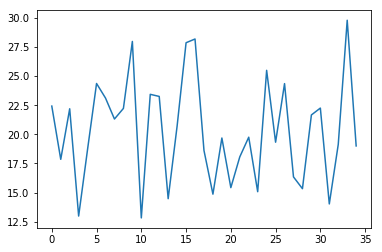

In [74]:
pr = []
for i in range(35):
    dt = pd.DataFrame()
    temp = df['%d'%(i+1979)]
    pr.append(np.sum(temp.PRCP))
plt.plot(pr)

In [1]:
#wuqing lon and lat:117.9, 39.4
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from osgeo import gdal
import os
 
name = []
path = r'H:\future_clim\pr\4.5\ACCESS1-0'
for i in os.listdir(path):
    if i.endswith('nc'):
        data = Dataset(path + os.sep + i)
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    institution: CSIRO (Commonwealth Scientific and Industrial Research Organisation, Australia), and BOM (Bureau of Meteorology, Australia)
    institute_id: CSIRO-BOM
    experiment_id: rcp45
    source: ACCESS1-0 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1.875 degrees EW x approx 1.25 degree NS, 38 levels); ocean: NOAA/GFDL MOM4p1 (nominal 1.0 degree EW x 1.0 degrees NS, tripolar north of 65N, equatorial refinement to 1/3 degree from 10S to 10 N, cosine dependent NS south of 25S, 50 levels); sea ice: CICE4.1 (nominal 1.0 degree EW x 1.0 degrees NS, tripolar north of 65N, equatorial refinement to 1/3 degree from 10S to 10 N, cosine dependent NS south of 25S); land: MOSES2 (1.875 degree EW x 1.25 degree NS, 4 levels
    model_id: ACCESS1-0
    forcing: GHG, Oz, SA, Sl, Vl, BC, OC, (GHG = CO2, N2O, CH4, CFC11, CFC12, CFC113, HCFC22, HFC125, HFC134a)
    parent_experiment_id: historical
 

In [83]:
np.where(data['lat'][:]==40)

(array([104], dtype=int64),)

In [84]:
np.where(data['lon'][:]==118.125)

(array([63], dtype=int64),)

In [2]:
import netCDF4
from netCDF4 import Dataset

name = 'GISS-E2-R'
dirs = [r'H:\future_clim\pr\4.5\%s'%name,r'H:\future_clim\pr\8.5\%s'%name,r'H:\future_clim\tasmax\4.5\%s'%name,
 r'H:\future_clim\tasmax\8.5\%s'%name,r'H:\future_clim\tasmin\4.5\%s'%name,r'H:\future_clim\tasmin\8.5\%s'%name]
var = ['pr', 'pr', 'tasmax', 'tasmax', 'tasmin', 'tasmin']
var1 = ['pr4.5', 'pr8.5', 'tasmax4.5', 'tasmax8.5', 'tasmin4.5', 'tasmin8.5']
dt = pd.DataFrame()
for i in range(6):
    data = netCDF4.MFDataset([(dirs[i]+ os.sep+j) for j in os.listdir(dirs[i]) if  j.endswith('nc')])
    if i <2:
        dt[var1[i]] = data[var[i]][:,64,47]*3600*24*30
    else:
        dt[var1[i]] = data[var[i]][:,64,47]-273.15
                
dt.to_csv(r'H:\future_clim' + os.sep + name +'.csv')

In [3]:
for i in range(6):
    data = netCDF4.MFDataset([(dirs[i]+ os.sep+j) for j in os.listdir(dirs[i]) if  j.endswith('nc')])
    print(var1[i],len(data[var[i]][:,64,47]))
    print('#'*20)


pr4.5 1140
####################
pr8.5 1140
####################
tasmax4.5 1140
####################
tasmax8.5 1140
####################
tasmin4.5 1140
####################
tasmin8.5 1140
####################


In [3]:

path = r'H:\future_clim\pr\4.5\CNRM-CM5'
data = netCDF4.MFDataset([(path + os.sep+j) for j in os.listdir(path) if  j.endswith('nc')])#[(path+ os.sep+j) for j in os.listdir(path) if  j.endswith('nc')]

data

<class 'netCDF4._netCDF4.MFDataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    institution: CNRM (Centre National de Recherches Meteorologiques, Meteo-France, Toulouse,France) and CERFACS (Centre Europeen de Recherches et de Formation Avancee en Calcul Scientifique, Toulouse, France)
    institute_id: CNRM-CERFACS
    experiment_id: rcp45
    source: CNRM-CM5 2010 Atmosphere: ARPEGE-Climat (V5.2.1, TL127L31); Ocean: NEMO (nemo3.3.v10.6.6P, ORCA1degL42); Sea Ice: GELATO (V5.30); River Routing: TRIP (v1); Land: SURFEX (v5.1.c); Coupler : OASIS 3
    model_id: CNRM-CM5
    forcing: GHG, SA, Sl, BC, OC (Sl variation as a 13-year cycle, according to CMIP5 spec)
    parent_experiment_id: piControl
    parent_experiment_rip: r1i1p1
    branch_time: 146097.0
    contact: for all but decadal predictions : contact.CMIP5@meteo.fr - METEO-FRANCE, CNRM/GMGEC/ASTER, CNRS URA 1357, 42 Av. Coriolis F-31057 TOULOUSE CEDEX 1 /for decadal predictions : contact.CMIP5@cerfacs.fr - C

In [4]:
len(data['pr'][:,64,47])

1140

In [192]:
data['tasmax'][:,64,47]-273.15

array([ 1.9638672,  6.283783 ,  5.006897 , ..., 19.37967  , 13.473419 ,
        8.860077 ], dtype=float32)

In [116]:
np.where(dataset['lat'][:]==39.92181778)

(array([], dtype=int64),)

In [5]:
data['lat'][92]

masked_array(data=39.92181778,
             mask=False,
       fill_value=1e+20)

In [7]:
data['lon'][84]

masked_array(data=118.125,
             mask=False,
       fill_value=1e+20)